# ***EDA on Medical Insurance Charges of a Person***

**Health insurance is a contract that an insurance company pays for some or all of the cost of the health services you receive,like doctors' visits, hospital stays, and visits to the emergency room etc.Basically, it reimburses the medical charges or offers cashless treatment.**

# ***Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ***Data load***

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**This data set contains detailed information about insuranced customers, including their age, sex, body mass index (BMI), number of children, smoking status , region and insurance charges.By analyzing this data set we can extract useful insights that how age,gender and lifestyle choices of person can affect a person's insurance charges.**

In [3]:
print(df.shape)
print('\n')
print(df.info())

(1338, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# ***Data Cleaning***

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
print(df.duplicated().sum())
df[df.duplicated()]

1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df=df.drop_duplicates()
df.duplicated().sum()


0

In [7]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# ***CHARGES DISTRIBUTION***

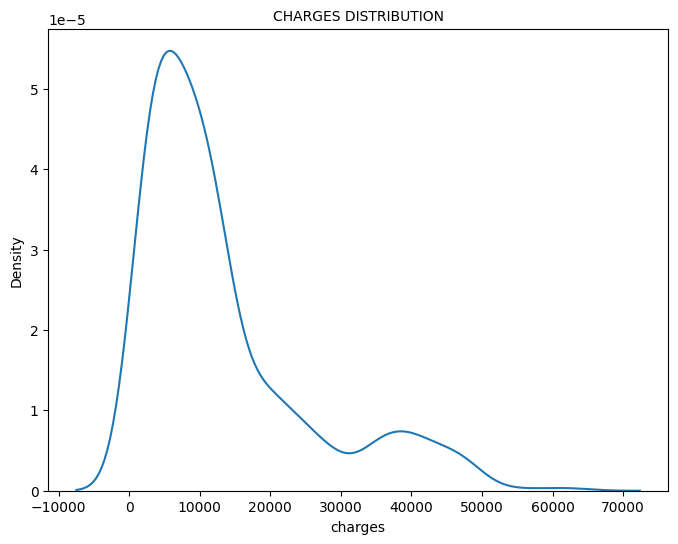

In [8]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['charges'])
plt.title("CHARGES DISTRIBUTION",fontsize=10)
plt.show()

# ***Age Distribution***

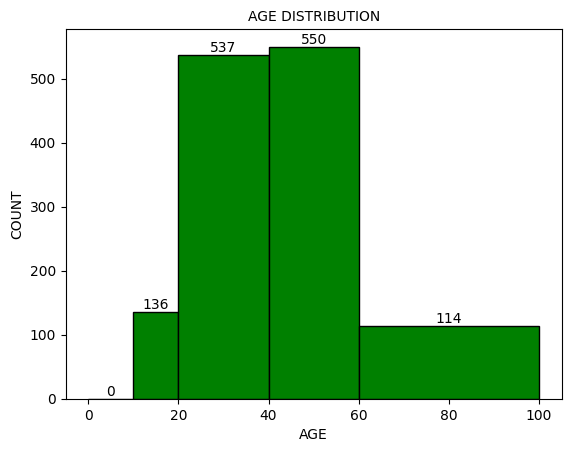

In [9]:
bin=[0,10,20,40,60,100]
ax=sns.histplot(df['age'],bins=bin)
for p in ax.patches:
    p.set_facecolor('green')
    width, height = p.get_width(), p.get_height()
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=10)
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.title("AGE DISTRIBUTION",fontsize=10)
plt.show()

# ***Q:How does age of the person affect the insurance charges?***

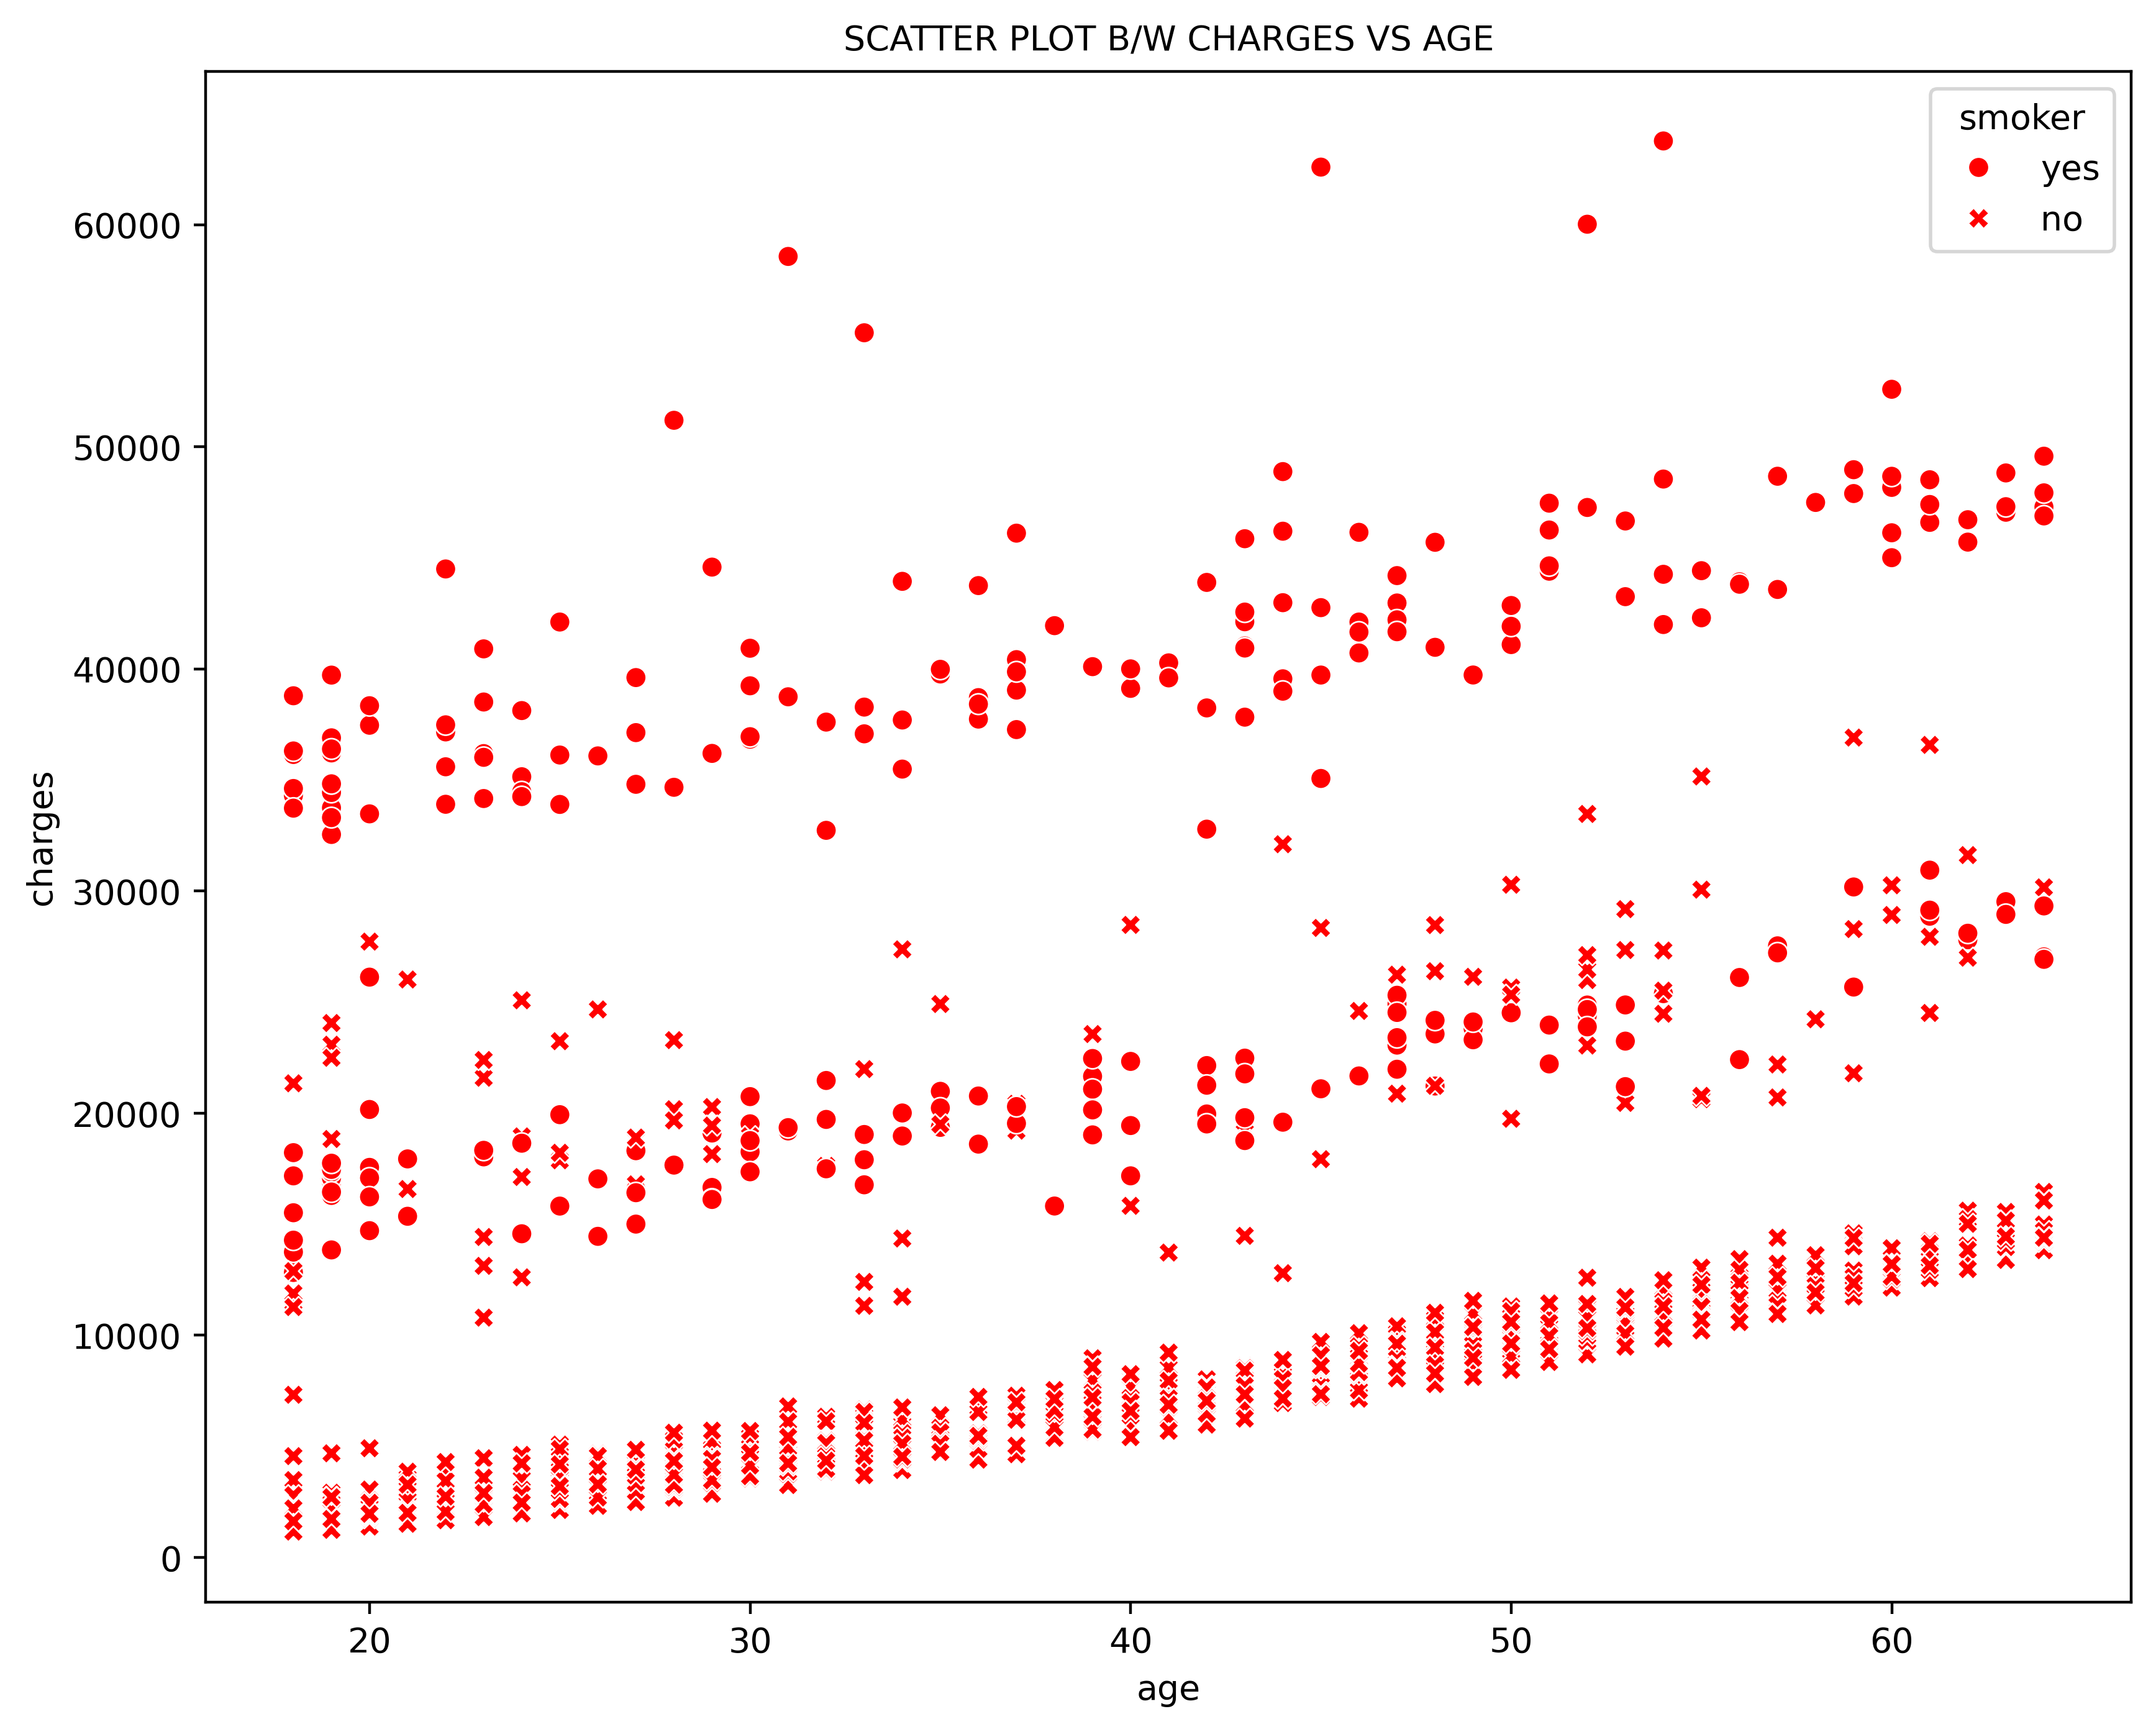

In [10]:
fig=plt.figure(figsize=(10,8),dpi=400)
sns.scatterplot(x='age',y='charges',data=df,style="smoker",color='r')
plt.title("SCATTER PLOT B/W CHARGES VS AGE",fontsize=10)
plt.show()

**From graph ,we can say that charges of person is increasing when age of the person is increasing.Also,the bands are created due to person's smoking status**.

# ***Bmi Distribution***

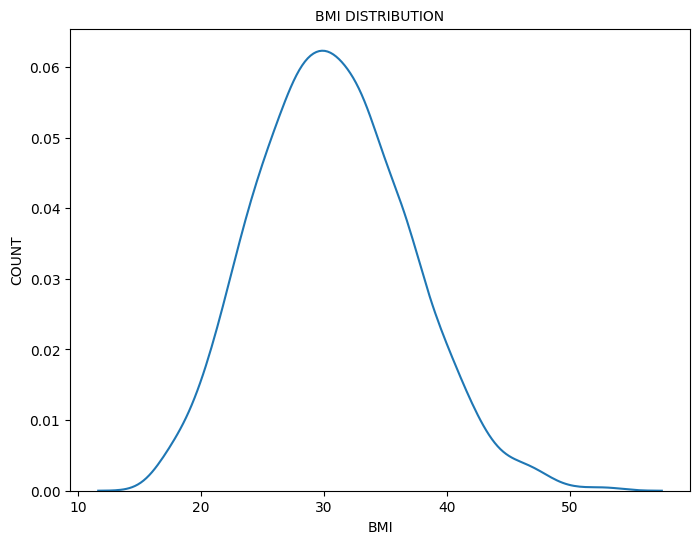

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(x=df['bmi'],hist=False)
plt.xlabel("BMI")
plt.ylabel("COUNT")
plt.title("BMI DISTRIBUTION",fontsize=10)
plt.show()

# ***Q:How does bmi of the person affect the insurance charges?***

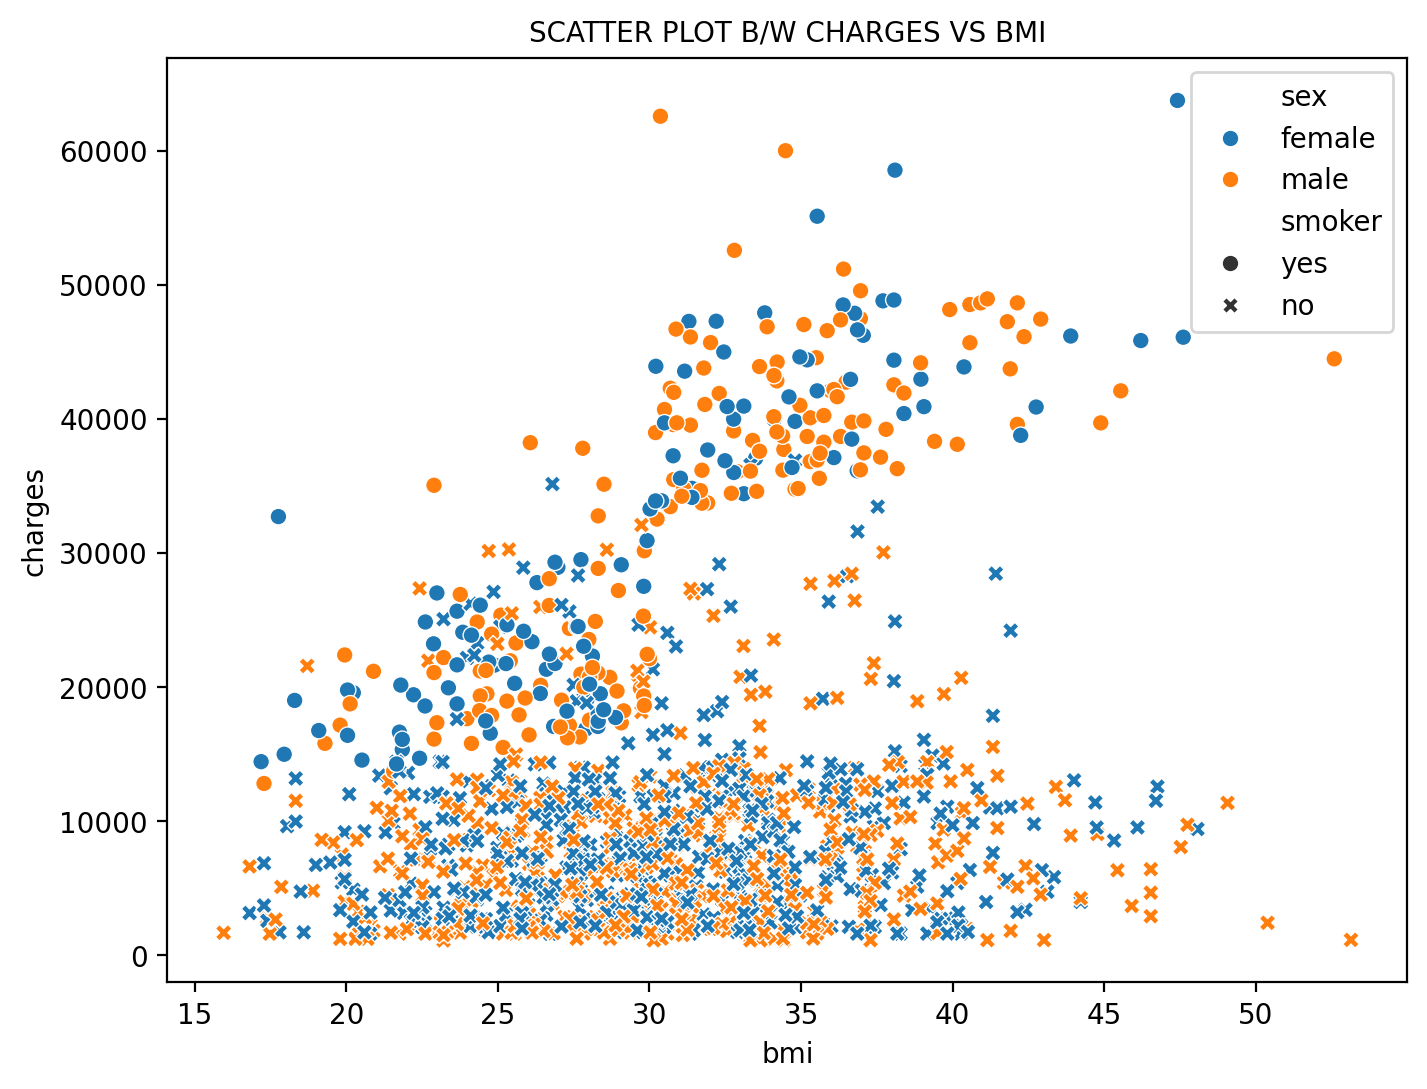

In [12]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(x='bmi',y='charges',data=df,hue="sex",style="smoker")
plt.title("SCATTER PLOT B/W CHARGES VS BMI",fontsize=10)
plt.show()

**From this plot, when the bmi is greater than normal range then some person's charges remain same and some person 's charges are increasing. So we can't always say that increasing bmi means charges increasing.Here we can say that when bmi is greater than normal range and the person is smoker then the charges is increasing.**

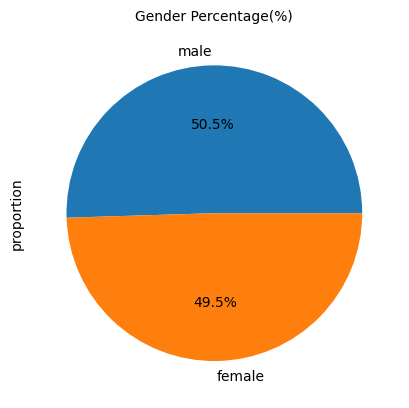

In [13]:
l=df.sex.value_counts(normalize=True)*100
l.plot(kind='pie',autopct='%1.1f%%')
plt.title("Gender Percentage(%)",fontsize=10)
plt.show()

**Here,Male and female both are interested for insurance**

# ***Q:Who are mostly interested for doing insurance based on no children?***

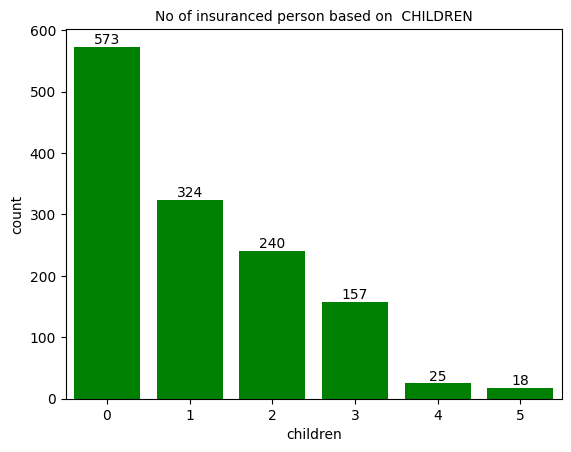

In [14]:
ax=sns.countplot(data=df,x='children')
for p in ax.patches:
    p.set_facecolor('green')
    width, height = p.get_width(), p.get_height()
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=10)
plt.title("No of insuranced person based on  CHILDREN",fontsize=10)
plt.show()

Nos of insuranced person who has no child is higher than the count of the person who has 1,2,3 children respectively.

**We can say that the person who have no child are mostly interested doing insurance.Also those who have less children are most interested.**

# ***Q:The person of which gender will pay more charges according to the smoking status ?***

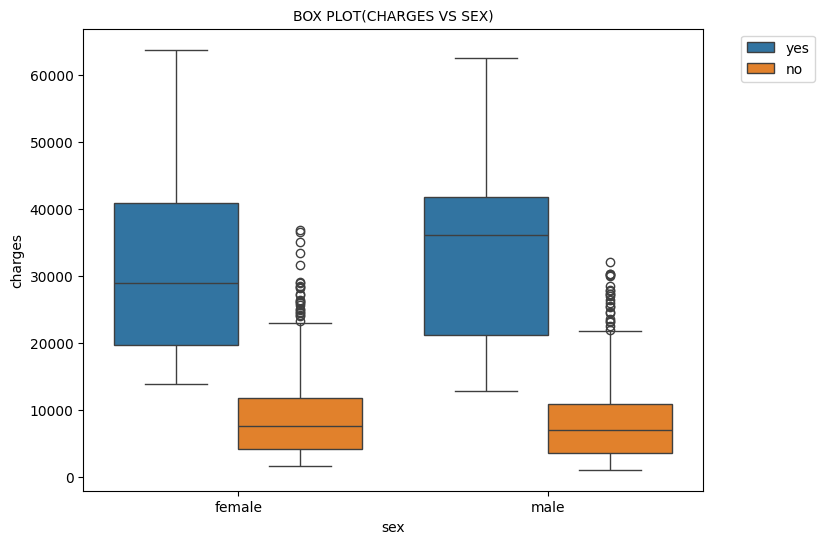

In [15]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(y="charges",x="sex",data=df,hue='smoker')
plt.title("BOX PLOT(CHARGES VS SEX)",fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)

We can see that median charges of the smoker higher than the median charges of the non smoker person either he/she is male or female.So,We can say that the smoker person is paying more charges than non-smoker person.For smoker person,both male and female smoker are paying almost same charges.From the graph,the median charges of the male smoker slightly higher than the median charges of the female smoker person .Similarly,For non-smoker person,both male and female non-smoker are paying almost same charges.**From the graph,the median charges of the female non-smoker slightly higher than the median charges of the male non-smoker person.So,We can conclude that male smoker paying little bit more charges than female smoker and female non smoker paying little bit more charges than male non smoker**

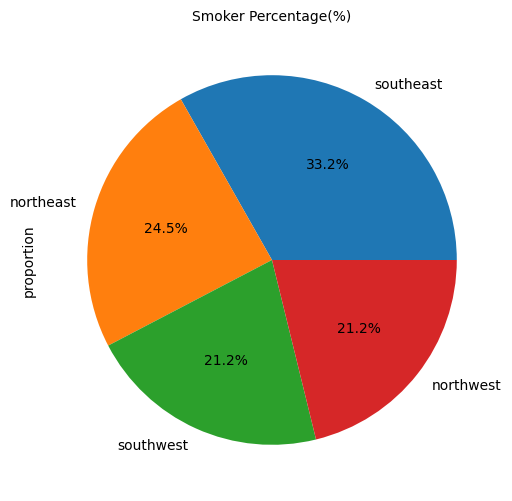

In [16]:
fig=plt.figure(figsize=(8,6))
df[df['smoker']=='yes'].region.value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.title("Smoker Percentage(%)",fontsize=10)
plt.show()

we can see that in each region has almost same non smoker percentage.

**We can say that in Southeast Region has highest no of smoker compare to other regions.So, Southeast region has highest no of smoker.**

# ***Q:The person of which region will pay high charges?***

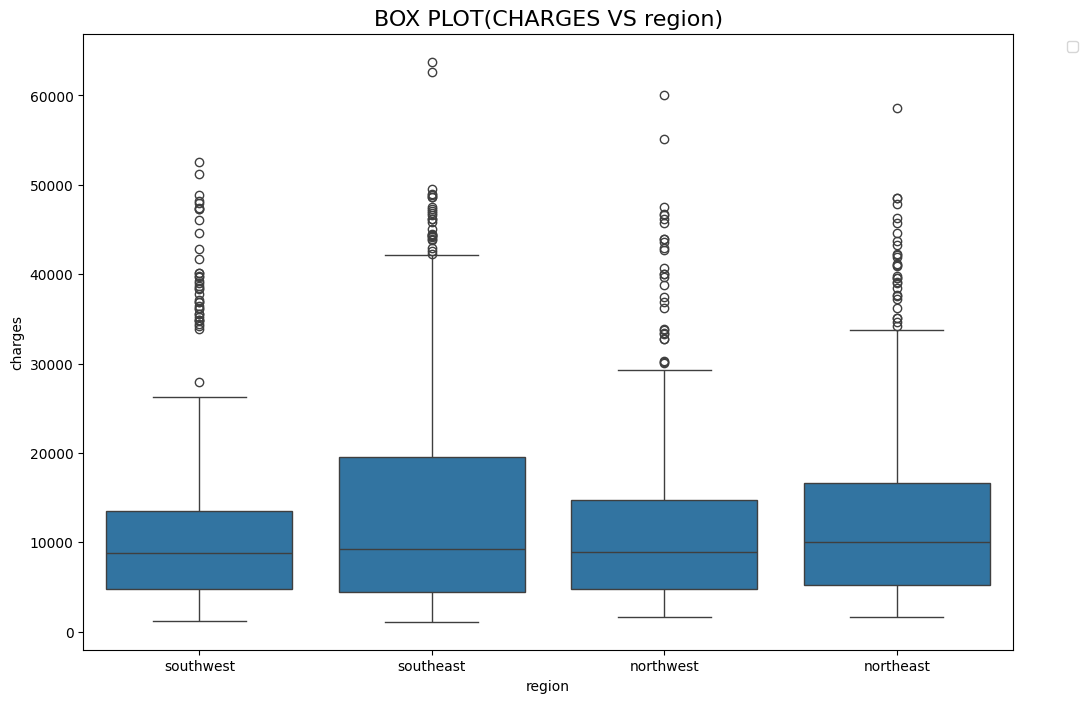

In [17]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(y="charges",x="region",data=df)
plt.title("BOX PLOT(CHARGES VS region)",fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.show()

**In each region, person's median charges are almost same,But,IQR for southeast region is higher than other region.We can say that SE region's person pays more charges .**



In [18]:
df=df.drop(['region','sex','smoker',"children"],axis=1)

In [19]:
df.corr()

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


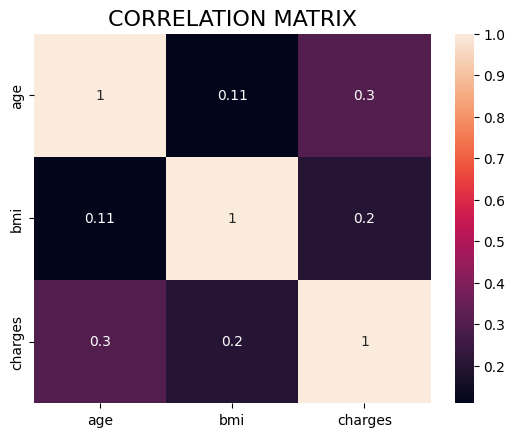

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.title("CORRELATION MATRIX",fontsize=16)
plt.show()

**we can see that age and charges have weakly positive correlation means age increases charges also increases but not very much. Similarly, Bmi and charges have very weakly positive correlation.SO increases of bmi and increases of age not affecting directly insurance charges very much.**

# ***Conclusion:***

**The main goal of this eda is to aware people about their own medical charges according to their fitness status.**